In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = '~/data/coco/'
annotation_path = ''.join([data_path, 'Annotations/train2014/'])

In [3]:


def load_csv(path):
    df = pd.read_csv(path,
                         usecols=['image_id', 'category_id'],
                         converters={'image_id':int, 'category_id':int})
    return df

def get_cooccurrence(df):
    frames = pd.get_dummies(df.category_id).groupby(df.image_id).apply(max) # get object occurance for each frame
    # calculate co-occurrance matrix
    frames_asint = frames.astype(int)
    coocc = frames_asint.T.dot(frames_asint)
    np.fill_diagonal(coocc.values, 0)
    # get self co-occurrence
    self_cooc = pd.get_dummies(df.category_id).groupby(df.image_id).apply(sum)
    # self_cocc = pd.DataFrame(self_occ[self_occ >= 2].count())
    self_cooc = self_cooc[self_cooc >= 2].count()
    for i in coocc.index:
        coocc.loc[i, i] = self_cooc[i]
    return coocc

def draw_plot(coocc):
    nba = coocc
    # Normalize data columns
    nba_norm = (nba - nba.mean()) / (nba.max() - nba.min())

    # Sort data according to Points, lowest to highest
    # This was just a design choice made by Yau
    # inplace=False (default) ->thanks SO user d1337
    nba_sort = nba

    # Plot it out
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(nba_sort, cmap=plt.cm.Reds, alpha=0.8)

    ##################################################
    ## FORMAT ##
    ##################################################

    fig = plt.gcf()
    fig.set_size_inches(20,20)

    # turn off the frame
    ax.set_frame_on(True)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(nba_sort.shape[0])+0.5, minor=False)
    ax.set_xticks(np.arange(nba_sort.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    # Set the labels

    # note I could have used nba_sort.columns but made "labels" instead
    ax.set_xticklabels(nba_sort.columns, minor=False) 
    ax.set_yticklabels(nba_sort.index, minor=False)

    # rotate the 
    plt.xticks(rotation=90)

    ax.grid(True)

    # Turn off all the ticks
    ax = plt.gca()

    for t in ax.xaxis.get_major_ticks(): 
        t.tick1On = False 
        t.tick2On = False 
    for t in ax.yaxis.get_major_ticks(): 
        t.tick1On = False 
        t.tick2On = False

    # plt.imshow(coocc,interpolation='nearest', cmap='Reds')
    # plt.colorbar()
    plt.show()
    
def draw_simple(coocc):
    plt.imshow(coocc,interpolation='nearest', cmap='Reds')
    plt.colorbar()
    plt.show()

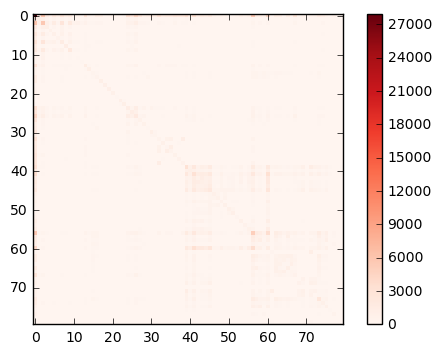

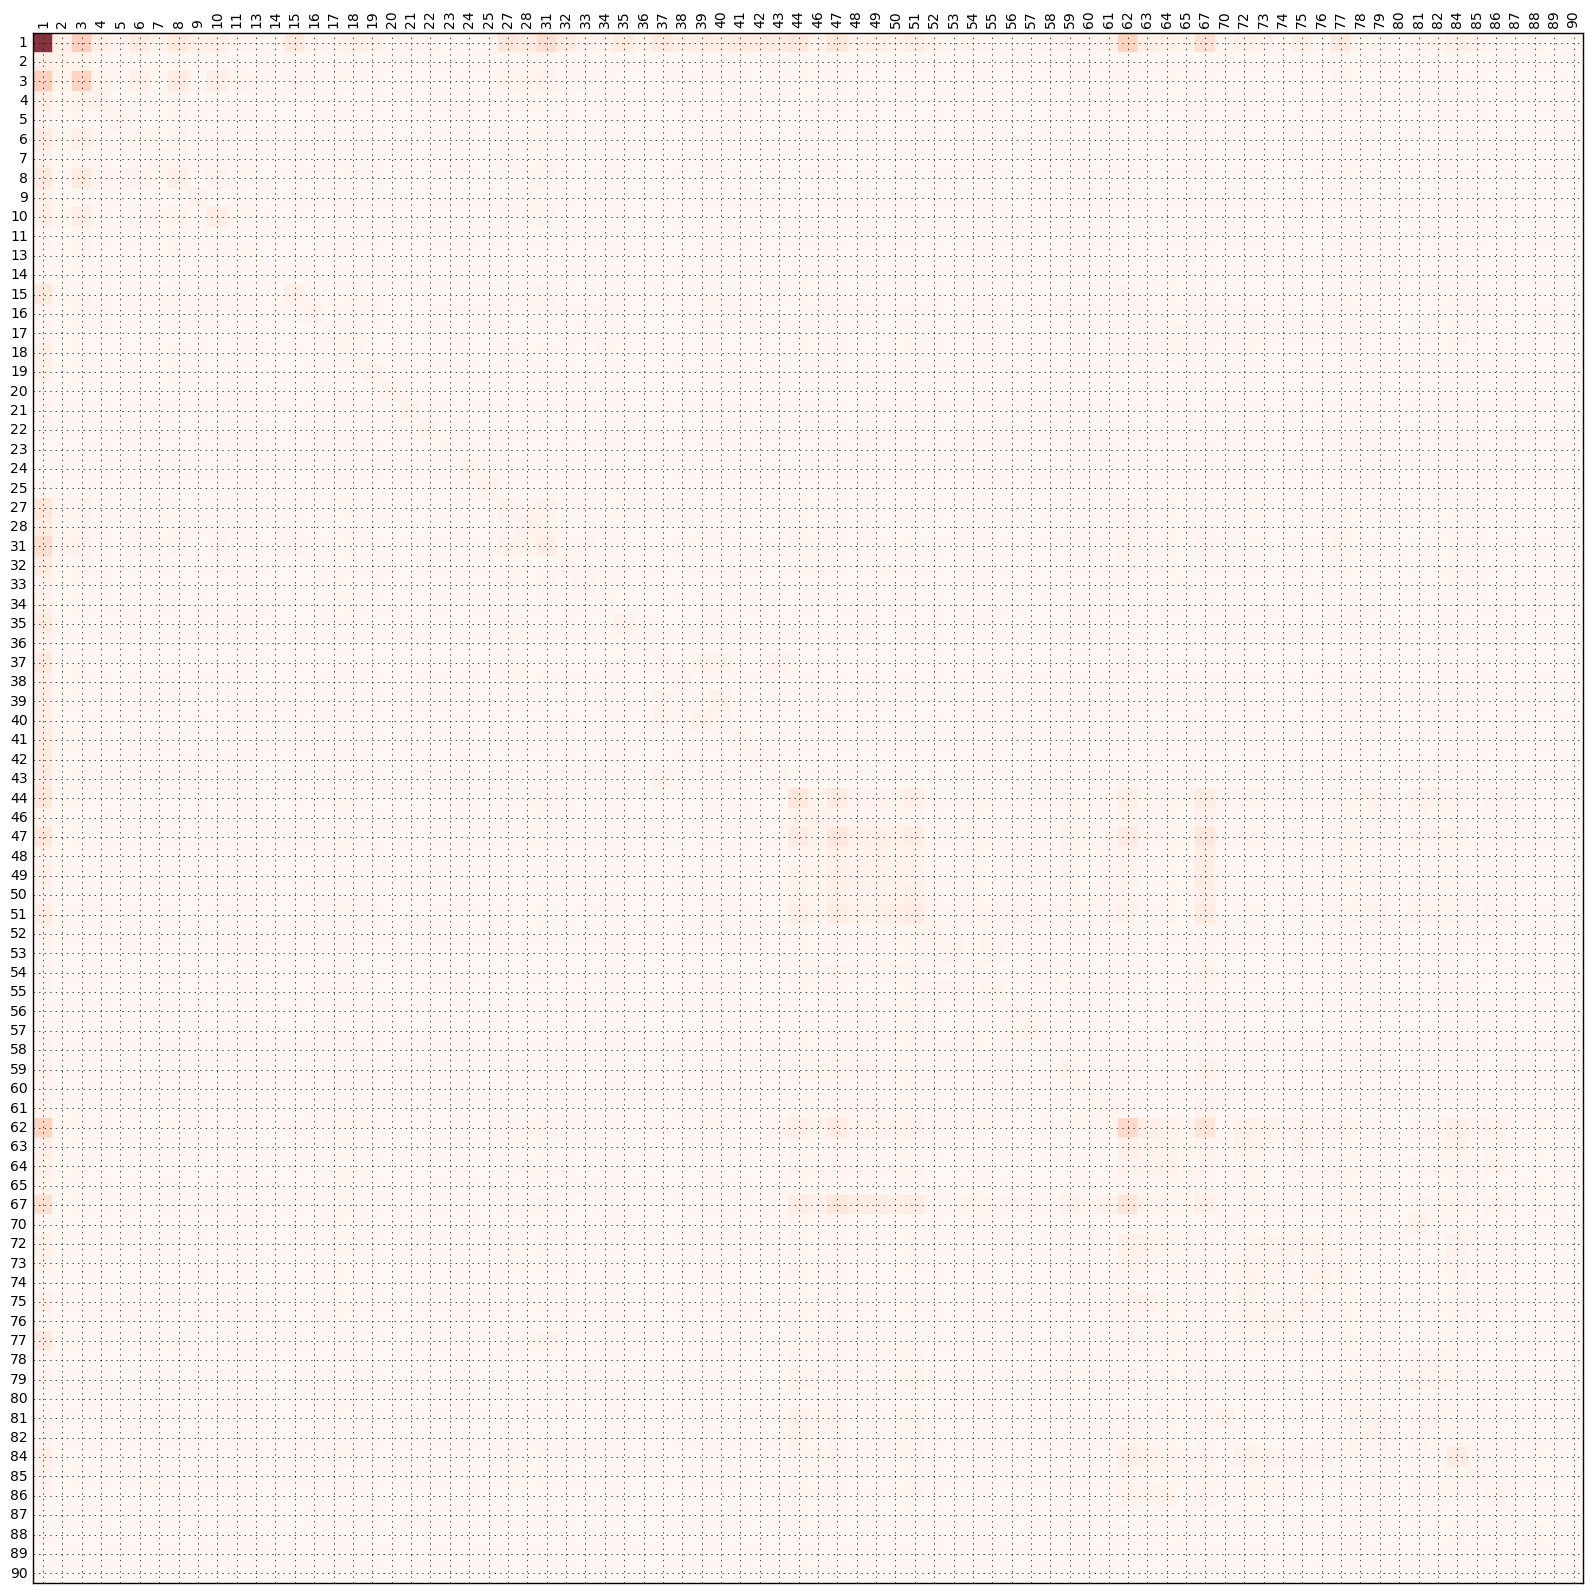

In [4]:
df = load_csv(''.join([data_path, 'present_objects.csv']))
coocc = get_cooccurrence(df)

draw_simple(coocc)
draw_plot(coocc)

In [5]:
self_cooc = pd.get_dummies(df.category_id).groupby(df.image_id).apply(sum)
self_cooc = self_cooc[self_cooc >= 2].count()
self_cooc

1     27881
2       908
3      5708
4      1033
5       671
6       797
7       445
8      1481
9      1214
10     2067
11       57
13      112
14      188
15     1370
16     1026
17      351
18      443
19     1005
20      910
21      929
22      821
23      178
24      897
25      998
27     1226
28     1221
31     1915
32      716
33      666
34      166
      ...  
56      856
57      893
58      313
59      807
60      638
61      695
62     5081
63      791
64     1179
65      255
67     1396
70      237
72      511
73      464
74      175
75     1030
76      356
77      645
78       69
79      239
80        2
81      500
82       98
84     2383
85      764
86      866
87      112
88      498
89        7
90      305
dtype: int64

In [7]:
coocc.to_csv(''.join([data_path, 'coco-coocc.csv']))

In [8]:
category_count = pd.DataFrame(df.category_id.value_counts())
category_count

,category_id
1,185316
3,30785
62,27147
84,17315
44,16983
47,14513
67,11167
51,10064
10,9159
31,8778


In [9]:
probability = coocc.div(category_count['category_id'], axis='index')
probability

,1,2,3,4,5,6,7,8,9,10,...,80,81,82,84,85,86,87,88,89,90
1,0.150451,0.010199,0.032712,0.010496,0.004214,0.011596,0.006071,0.015223,0.007393,0.009465,...,0.000216,0.003831,0.003362,0.008736,0.007047,0.003227,0.001435,0.003286,0.000308,0.002040
2,0.381433,0.183249,0.178406,0.064178,0.003027,0.061756,0.014329,0.062765,0.017356,0.065792,...,0.000202,0.001615,0.002422,0.009485,0.011302,0.002220,0.000807,0.003431,0.000000,0.000807
3,0.196914,0.028715,0.185415,0.031054,0.008835,0.048985,0.009680,0.084067,0.005750,0.057885,...,0.000000,0.000195,0.000845,0.002176,0.010297,0.000812,0.000227,0.001884,0.000032,0.000195
4,0.323036,0.052815,0.158778,0.171566,0.001661,0.036373,0.002823,0.075403,0.002491,0.036373,...,0.000000,0.000000,0.000664,0.002325,0.005979,0.000332,0.000166,0.001827,0.000000,0.000000
5,0.203757,0.003913,0.070963,0.002609,0.175059,0.013566,0.000783,0.121837,0.016436,0.004435,...,0.000000,0.000261,0.000261,0.000522,0.002087,0.000000,0.000000,0.000522,0.000261,0.000000
6,0.496649,0.070719,0.348509,0.050612,0.012018,0.184192,0.015022,0.151375,0.009244,0.141900,...,0.000231,0.000000,0.000000,0.001849,0.027502,0.000231,0.000000,0.001387,0.000000,0.000000
7,0.356125,0.022475,0.094334,0.005381,0.000950,0.020576,0.140867,0.039253,0.013928,0.090852,...,0.000000,0.000317,0.000317,0.003799,0.018360,0.000633,0.000000,0.001583,0.000000,0.000000
8,0.400142,0.044113,0.367092,0.064397,0.066241,0.092908,0.017589,0.210071,0.015319,0.105532,...,0.000000,0.000142,0.001135,0.002411,0.011915,0.000993,0.000567,0.001560,0.000000,0.000000
9,0.180501,0.011331,0.023320,0.001976,0.008300,0.005270,0.005797,0.014229,0.159947,0.001186,...,0.000000,0.000395,0.000132,0.001054,0.005534,0.001318,0.000000,0.001186,0.000000,0.000264
10,0.191506,0.035593,0.194563,0.023911,0.001856,0.067038,0.031335,0.081232,0.000983,0.225680,...,0.000000,0.000000,0.000109,0.000983,0.015395,0.000328,0.000109,0.000437,0.000000,0.000000


In [10]:
probability.to_csv(''.join([data_path, 'coco-coocc-prob.csv']))

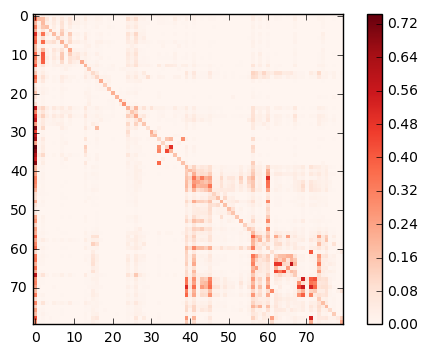

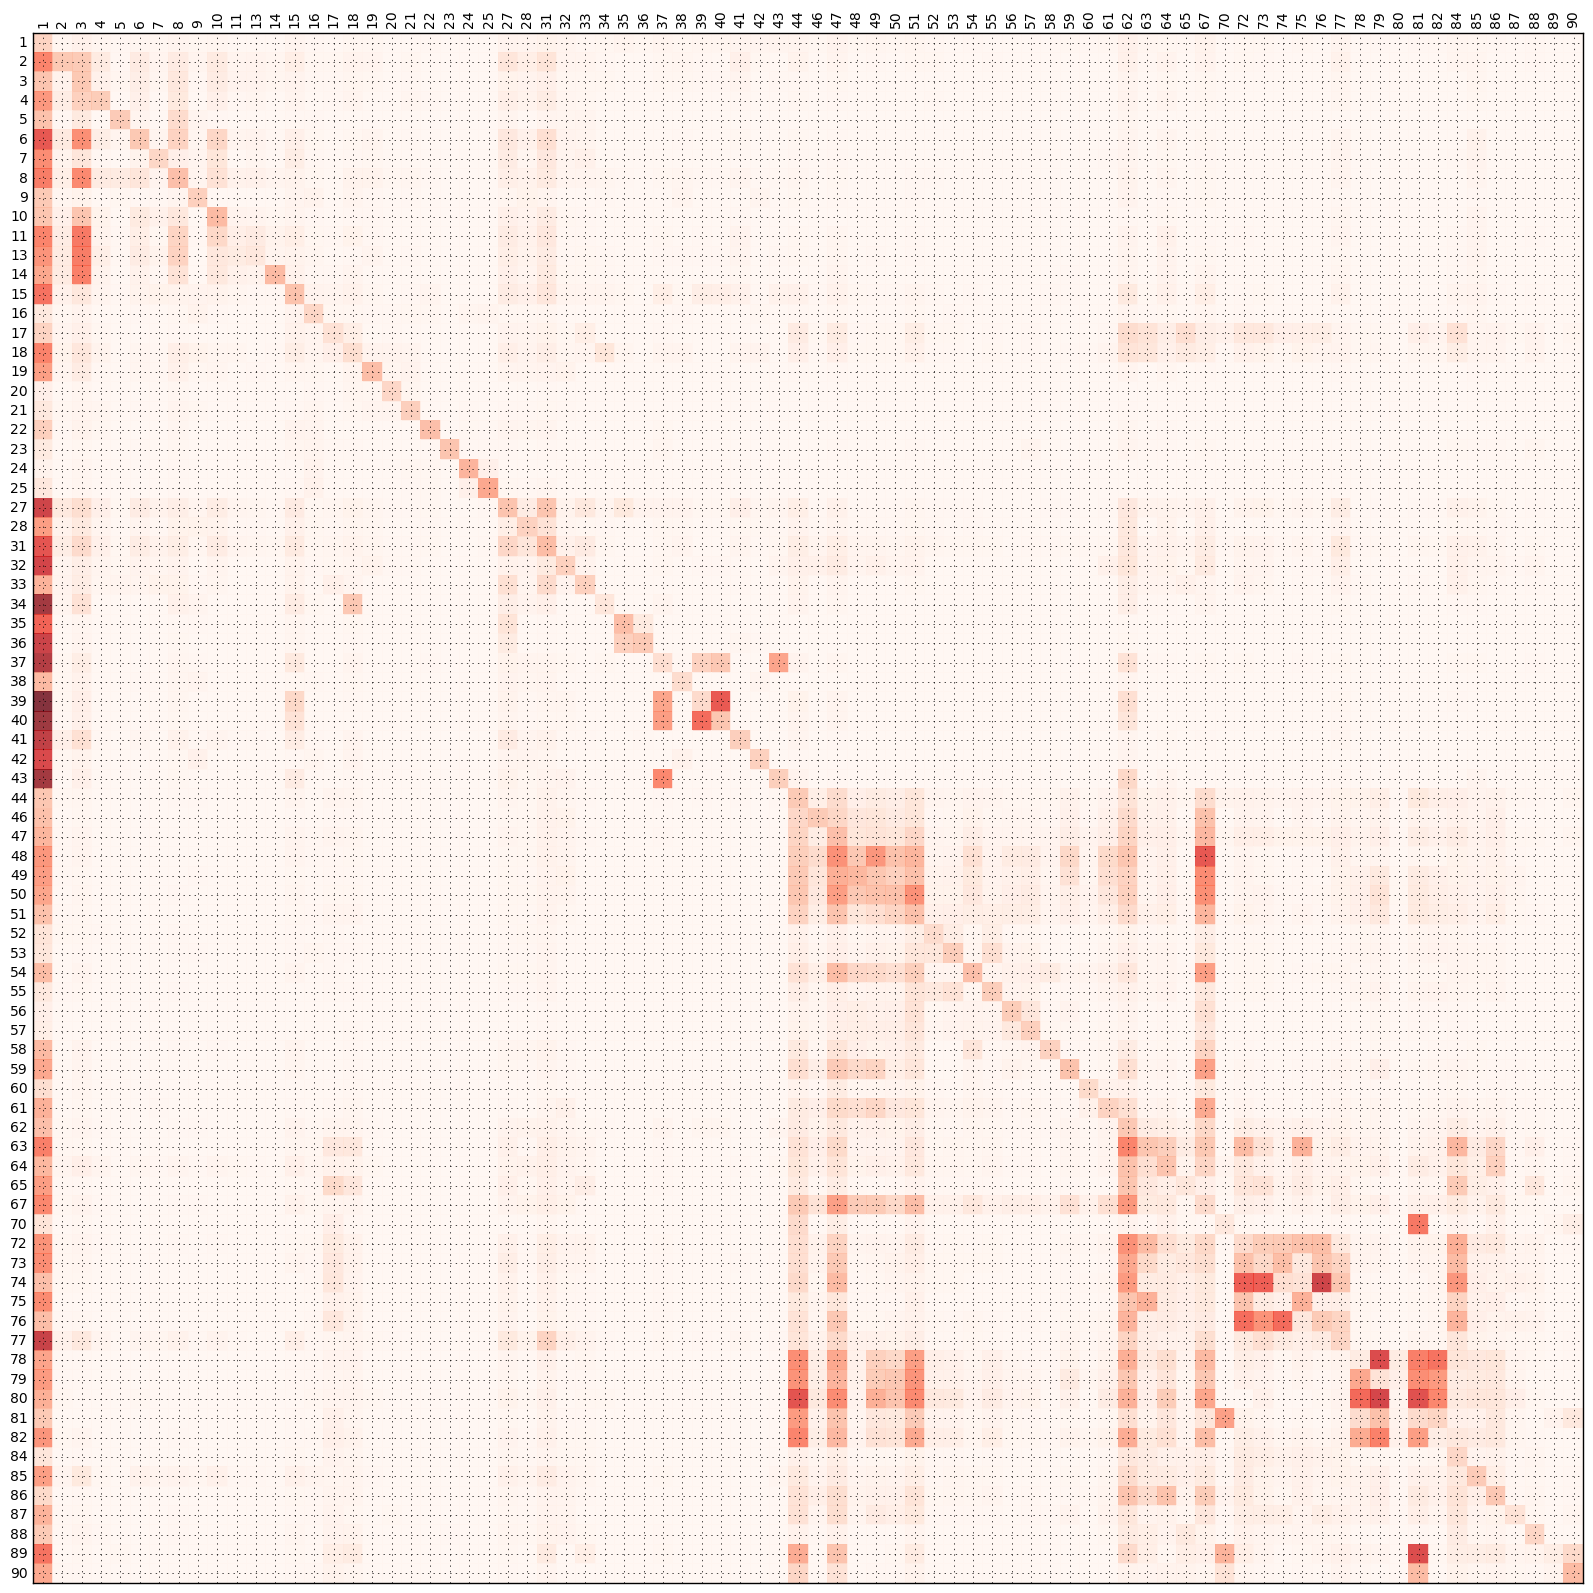

In [11]:
draw_simple(probability)
draw_plot(probability)


In [12]:
len(probability.index)

80